# Decision Tree Project 2: `make_moons` dataset



In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)



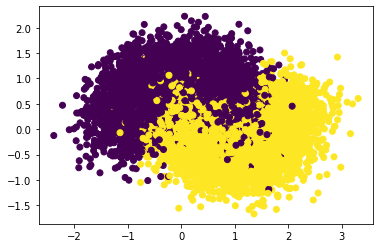

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

params = {'min_samples_split': list(range(2, 5)),
          'max_leaf_nodes': list(range(2, 50))
          }
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [70]:
clf = grid_search_cv.best_estimator_

In [71]:
y_p = clf.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_p, y_test)

0.8695

In [73]:
grid_search_cv.best_params_

{'max_leaf_nodes': 17, 'min_samples_split': 2}

[Text(0.5365384615384615, 0.9375, 'X[1] <= 0.296\ngini = 0.5\nsamples = 8000\nvalue = [3987, 4013]'),
 Text(0.19615384615384615, 0.8125, 'X[0] <= -0.476\ngini = 0.367\nsamples = 4275\nvalue = [1036, 3239]'),
 Text(0.06153846153846154, 0.6875, 'X[0] <= -0.764\ngini = 0.183\nsamples = 472\nvalue = [424, 48]'),
 Text(0.03076923076923077, 0.5625, 'gini = 0.035\nsamples = 333\nvalue = [327, 6]'),
 Text(0.09230769230769231, 0.5625, 'X[1] <= 0.047\ngini = 0.422\nsamples = 139\nvalue = [97, 42]'),
 Text(0.06153846153846154, 0.4375, 'gini = 0.496\nsamples = 70\nvalue = [38, 32]'),
 Text(0.12307692307692308, 0.4375, 'gini = 0.248\nsamples = 69\nvalue = [59, 10]'),
 Text(0.33076923076923076, 0.6875, 'X[1] <= -0.062\ngini = 0.27\nsamples = 3803\nvalue = [612, 3191]'),
 Text(0.2153846153846154, 0.5625, 'X[1] <= -0.371\ngini = 0.147\nsamples = 2426\nvalue = [194, 2232]'),
 Text(0.18461538461538463, 0.4375, 'gini = 0.079\nsamples = 1336\nvalue = [55, 1281]'),
 Text(0.24615384615384617, 0.4375, 'X[0] 

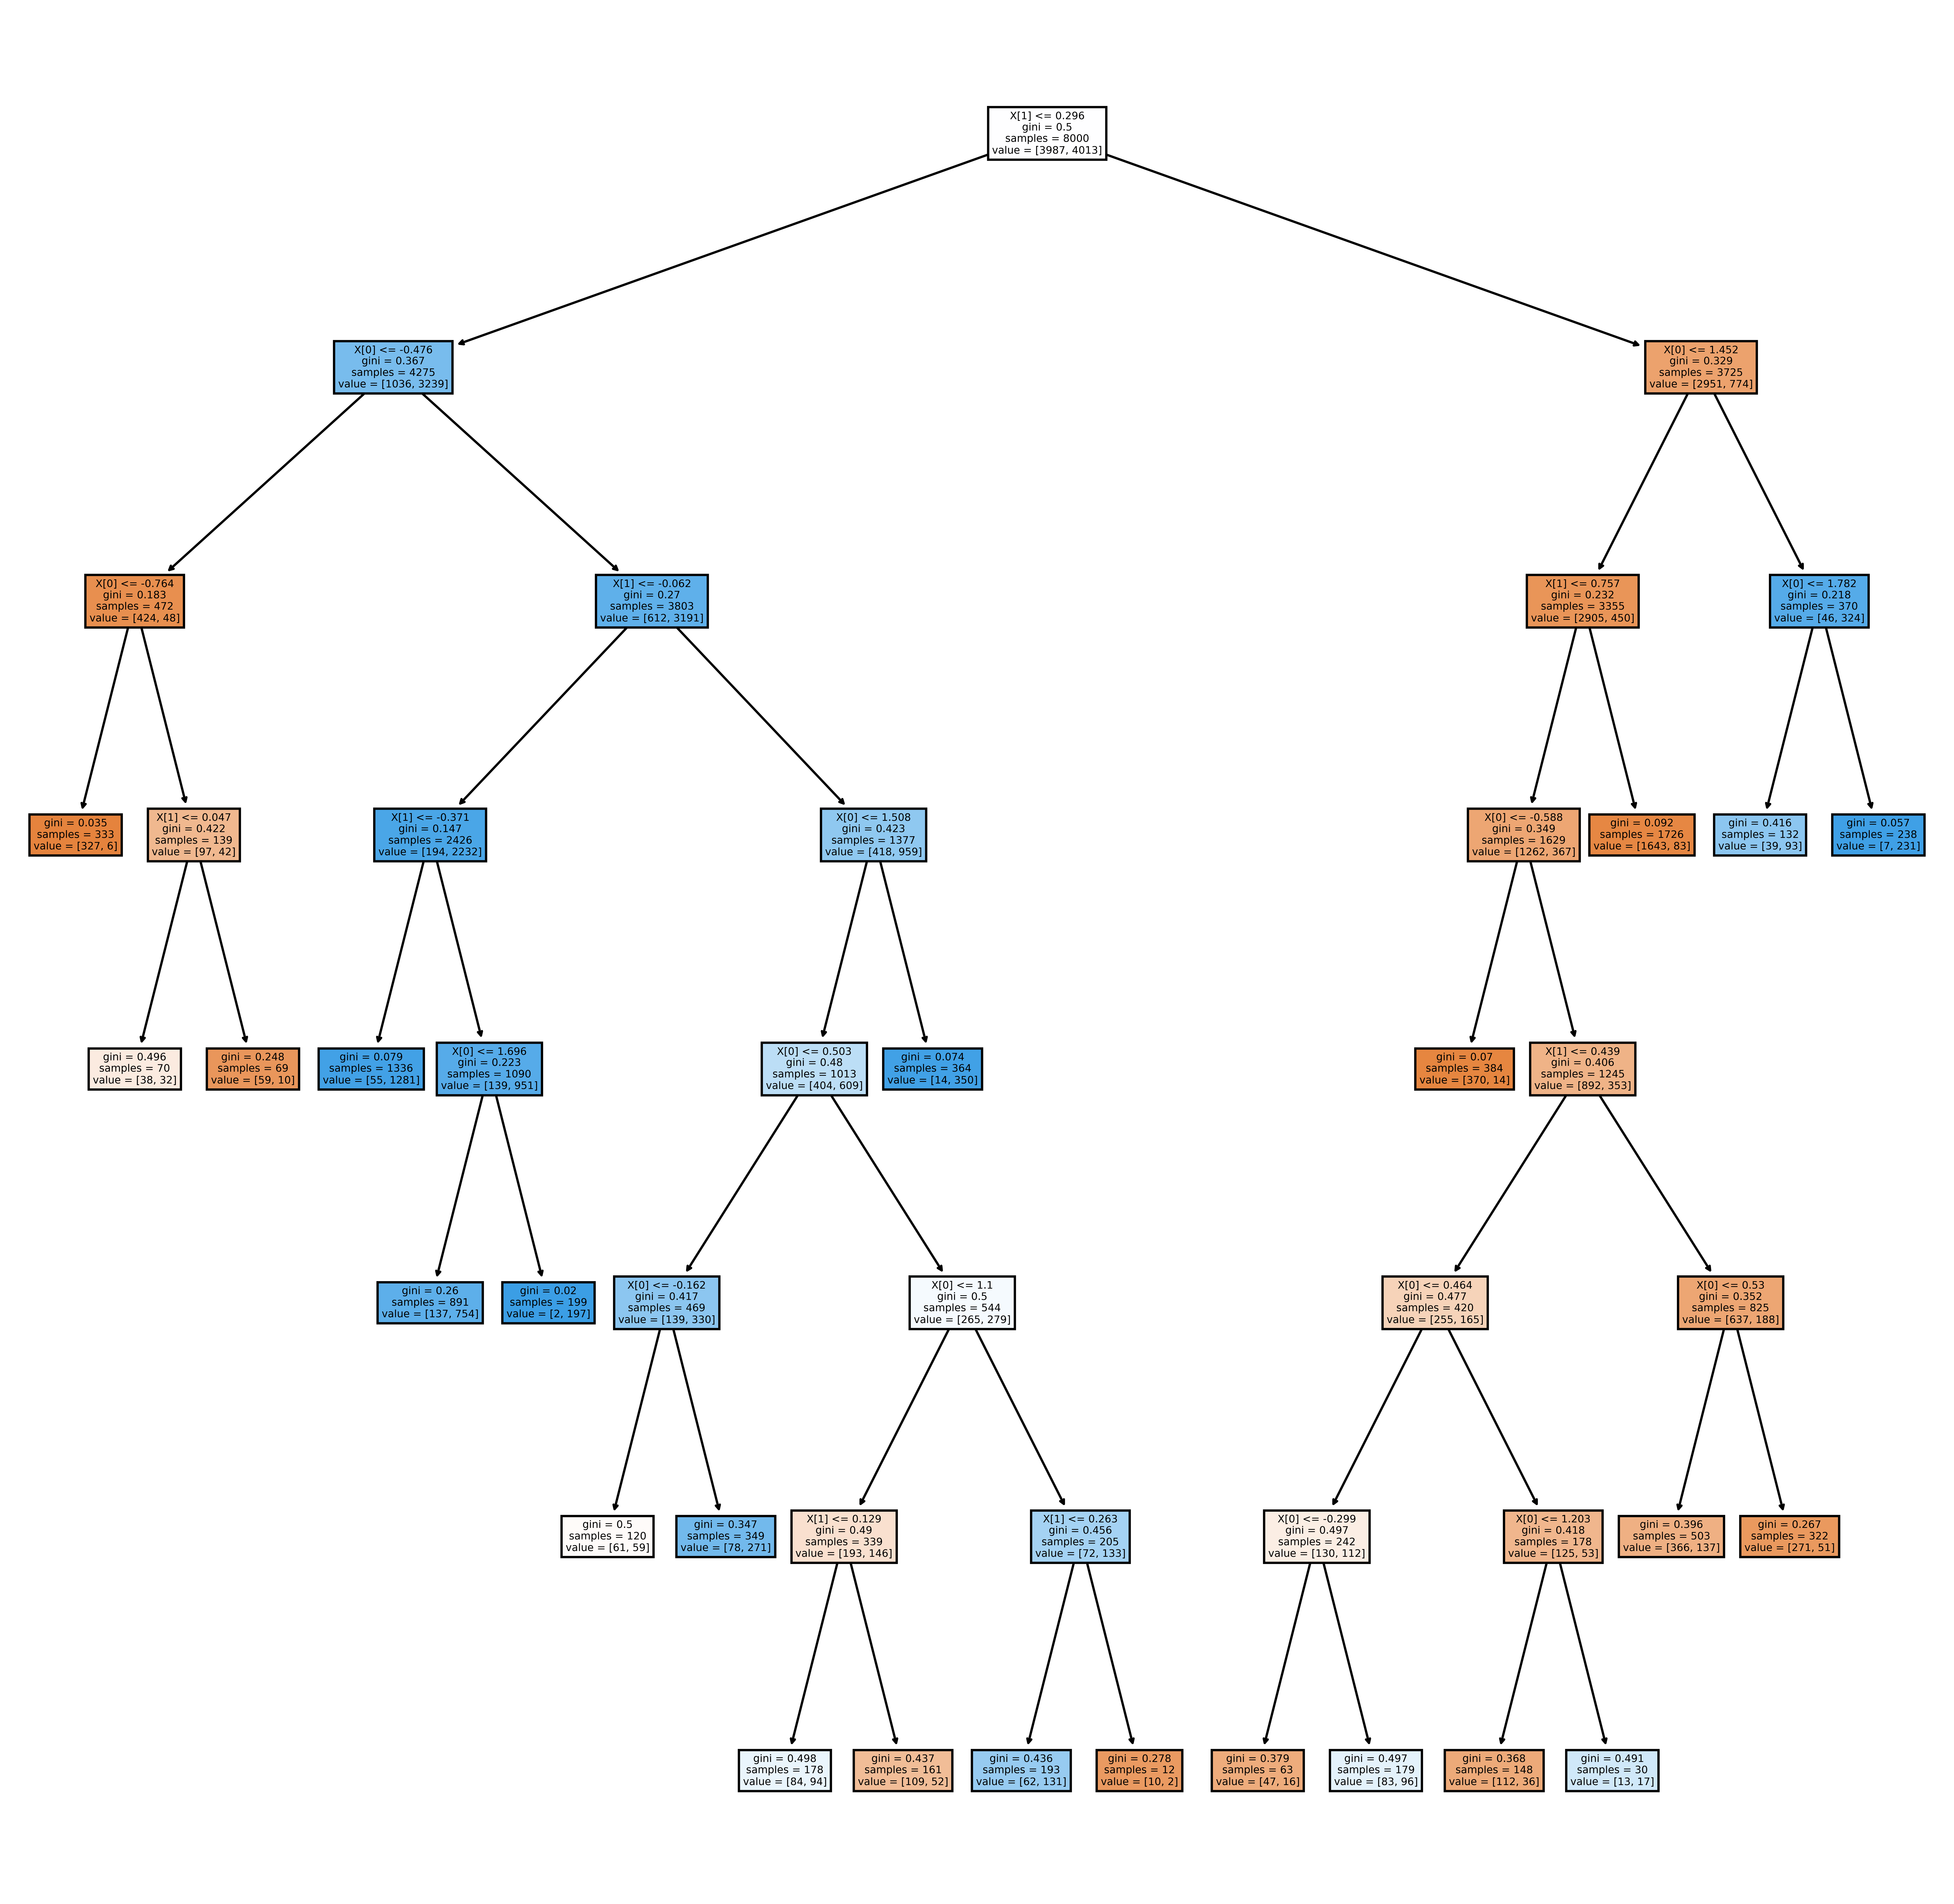

In [68]:
from sklearn import tree
plt.figure(figsize=(15,15), dpi=600)
tree.plot_tree(clf, filled=True)


In [18]:
y_p

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 

In [20]:
graph = graphviz.Source(dot_data) 

In [21]:
graph.render("iris") 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [22]:
accuracy_score(y_test, grid_search_cv.predict(X_test))

0.8695